In [4]:
import scipy.io
import scipy.stats
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

# Data Processing 

## Load Spiking Activity of Inhibitory Units

In [5]:
# load spiking activity
files = listdir("dataset/subtypes")

files.remove('.DS_Store')

animals ={}
for fl in files: 
    mat = scipy.io.loadmat('dataset/subtypes/'+fl)
    if 'Si_CellFormat' in mat.keys():
        animals[fl] = mat['Si_CellFormat']
        
for animal in animals.keys():
    name = animal.replace("_SSubtypes.mat", "")
    animals[name] = animals.pop(animal)

## Load Sleep Wake Cycles 

In [6]:
# load sleep wake cycles
intervals = listdir("dataset/intervals")
intervals.remove('.DS_Store')

SW_cycles ={}
for interval in intervals: 
    mat = scipy.io.loadmat('dataset/intervals/'+interval)
    unwanted = set(mat)- set(['SleepTimePairFormat','WakeTimePairFormat','SWSEpisodeTimePairFormat','SWSPacketTimePairFormat','REMTimePairFormat','REMEpisodeTimePairFormat','WakeSleepTimePairFormat']) 
    for unwanted_key in unwanted: 
        del mat[unwanted_key]
    SW_cycles[interval] = mat
    
for animal in SW_cycles.keys():
    name = animal.replace("_WSRestrictedIntervals.mat", "")
    SW_cycles[name] = SW_cycles.pop(animal)
    
for animal in SW_cycles: 
    if animal not in animals.keys(): 
        SW_cycles.pop(animal)
        break

## Load Beginning and End Times of Recording Session 

In [7]:
# load start stop times
times = listdir("dataset/time")
times.remove('.DS_Store')

start_stop ={}
for time in times: 
    mat = scipy.io.loadmat('dataset/time/'+ time)
    start_stop[time] = mat['bmd']['RecordingFileIntervals']
    
for animal in start_stop.keys():
    name = animal.replace("_BasicMetaData.mat", "")
    start_stop[name] = start_stop.pop(animal)

#merge times
for i in start_stop.keys():
    if i != '20140528_565um' and i != '20140527_421um':
        start_stop[i] = start_stop[i][0][0][-1][1]

## Combine Information into All_Neurons

In [14]:
# bring it all together
all_neurons = []
for animal in animals:
    if animal == '20140527_421um' or animal == '20140528_565um':
        for i in range(animals[animal].shape[1]):
            neuron_activity = animals[animal][:,i][0]
            recording_time = animals[animal][:,i][0][-1][0]
            pair = [animal, neuron_activity, recording_time]
            all_neurons.append(pair)
            
    else: 
        for i in range(animals[animal].shape[1]): 
            neuron_activity = animals[animal][:,i][0]
            recording_time = start_stop[animal]
            pair = [animal, neuron_activity, recording_time]
            all_neurons.append(pair)                   

## Include Beginning and End Times of Sleep, REM, NREM

In [9]:
# add separations of sleep 

# wake and sleep time pair intervals
wake_sleep_per_animal = []
for neuron in all_neurons: 
    time_wake = SW_cycles[neuron[0]]['WakeTimePairFormat']
    time_sleep = SW_cycles[neuron[0]]['SleepTimePairFormat']
    pair = [neuron[0], time_wake, time_sleep]
    wake_sleep_per_animal.append(pair)

# rem non-rem time pair intervals 
rem_non_rem_per_animal = []
for neuron in all_neurons: 
    time_rem = SW_cycles[neuron[0]]['REMTimePairFormat']
    time_non_rem = SW_cycles[neuron[0]]['SWSPacketTimePairFormat']
    pair = [neuron[0], time_rem, time_non_rem]
    rem_non_rem_per_animal.append(pair)
    

## Plots of Data Loading

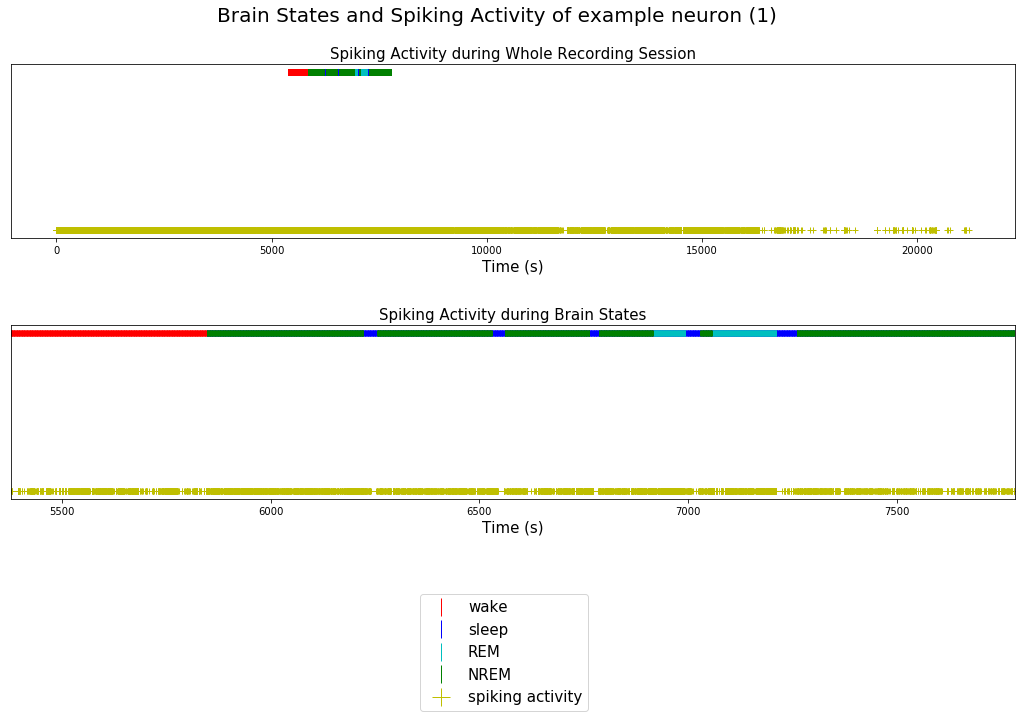

In [292]:
fig, ax = plt.subplots(2,1, figsize = (18,8))

ax[0].plot(range(wake_sleep_per_animal[0][1][0][0],wake_sleep_per_animal[0][1][0][1]), np.ones_like(range(wake_sleep_per_animal[0][1][0][0],wake_sleep_per_animal[0][1][0][1])), 'r|', label = 'wake')

ax[0].plot(range(wake_sleep_per_animal[0][2][0][0],wake_sleep_per_animal[0][2][0][1]), np.ones_like(range(wake_sleep_per_animal[0][2][0][0],wake_sleep_per_animal[0][2][0][1])), 'b|', label = 'sleep')

ax[0].plot(range(rem_non_rem_per_animal[0][1][0][0],rem_non_rem_per_animal[0][1][0][1]), np.ones_like(range(rem_non_rem_per_animal[0][1][0][0],rem_non_rem_per_animal[0][1][0][1])), 'c|', label = 'REM')
ax[0].plot(range(rem_non_rem_per_animal[0][1][1][0],rem_non_rem_per_animal[0][1][1][1]), np.ones_like(range(rem_non_rem_per_animal[0][1][1][0],rem_non_rem_per_animal[0][1][1][1])), 'c|')

ax[0].plot(range(rem_non_rem_per_animal[0][2][0][0],rem_non_rem_per_animal[0][2][0][1]), np.ones_like(range(rem_non_rem_per_animal[0][2][0][0],rem_non_rem_per_animal[0][2][0][1])), 'g|', label = 'NREM')
ax[0].plot(range(rem_non_rem_per_animal[0][2][1][0],rem_non_rem_per_animal[0][2][1][1]), np.ones_like(range(rem_non_rem_per_animal[0][2][1][0],rem_non_rem_per_animal[0][2][1][1])), 'g|')
ax[0].plot(range(rem_non_rem_per_animal[0][2][2][0],rem_non_rem_per_animal[0][2][2][1]), np.ones_like(range(rem_non_rem_per_animal[0][2][2][0],rem_non_rem_per_animal[0][2][2][1])), 'g|')
ax[0].plot(range(rem_non_rem_per_animal[0][2][3][0],rem_non_rem_per_animal[0][2][3][1]), np.ones_like(range(rem_non_rem_per_animal[0][2][3][0],rem_non_rem_per_animal[0][2][3][1])), 'g|')
ax[0].plot(range(rem_non_rem_per_animal[0][2][4][0],rem_non_rem_per_animal[0][2][4][1]), np.ones_like(range(rem_non_rem_per_animal[0][2][4][0],rem_non_rem_per_animal[0][2][4][1])), 'g|')
ax[0].plot(range(rem_non_rem_per_animal[0][2][5][0],rem_non_rem_per_animal[0][2][5][1]), np.ones_like(range(rem_non_rem_per_animal[0][2][5][0],rem_non_rem_per_animal[0][2][5][1])), 'g|')

ax[0].plot(all_neurons[0][1], 0 * np.ones_like(all_neurons[0][1]), 'y+', label = 'spiking activity')

ax[0].set_yticks([])
ax[0].set_xlabel('Time (s)', fontsize = 15)
ax[0].set_title('Spiking Activity during Whole Recording Session', fontsize = 15)

ax[1].plot(range(wake_sleep_per_animal[0][1][0][0],wake_sleep_per_animal[0][1][0][1]), np.ones_like(range(wake_sleep_per_animal[0][1][0][0],wake_sleep_per_animal[0][1][0][1])), 'r|', label = 'wake')

ax[1].plot(range(wake_sleep_per_animal[0][2][0][0],wake_sleep_per_animal[0][2][0][1]), np.ones_like(range(wake_sleep_per_animal[0][2][0][0],wake_sleep_per_animal[0][2][0][1])), 'b|', label = 'sleep')

ax[1].plot(range(rem_non_rem_per_animal[0][1][0][0],rem_non_rem_per_animal[0][1][0][1]), np.ones_like(range(rem_non_rem_per_animal[0][1][0][0],rem_non_rem_per_animal[0][1][0][1])), 'c|', label = 'REM')
ax[1].plot(range(rem_non_rem_per_animal[0][1][1][0],rem_non_rem_per_animal[0][1][1][1]), np.ones_like(range(rem_non_rem_per_animal[0][1][1][0],rem_non_rem_per_animal[0][1][1][1])), 'c|')

ax[1].plot(range(rem_non_rem_per_animal[0][2][0][0],rem_non_rem_per_animal[0][2][0][1]), np.ones_like(range(rem_non_rem_per_animal[0][2][0][0],rem_non_rem_per_animal[0][2][0][1])), 'g|', label = 'NREM')
ax[1].plot(range(rem_non_rem_per_animal[0][2][1][0],rem_non_rem_per_animal[0][2][1][1]), np.ones_like(range(rem_non_rem_per_animal[0][2][1][0],rem_non_rem_per_animal[0][2][1][1])), 'g|')
ax[1].plot(range(rem_non_rem_per_animal[0][2][2][0],rem_non_rem_per_animal[0][2][2][1]), np.ones_like(range(rem_non_rem_per_animal[0][2][2][0],rem_non_rem_per_animal[0][2][2][1])), 'g|')
ax[1].plot(range(rem_non_rem_per_animal[0][2][3][0],rem_non_rem_per_animal[0][2][3][1]), np.ones_like(range(rem_non_rem_per_animal[0][2][3][0],rem_non_rem_per_animal[0][2][3][1])), 'g|')
ax[1].plot(range(rem_non_rem_per_animal[0][2][4][0],rem_non_rem_per_animal[0][2][4][1]), np.ones_like(range(rem_non_rem_per_animal[0][2][4][0],rem_non_rem_per_animal[0][2][4][1])), 'g|')
ax[1].plot(range(rem_non_rem_per_animal[0][2][5][0],rem_non_rem_per_animal[0][2][5][1]), np.ones_like(range(rem_non_rem_per_animal[0][2][5][0],rem_non_rem_per_animal[0][2][5][1])), 'g|')

ax[1].plot(all_neurons[0][1], 0 * np.ones_like(all_neurons[0][1]), 'y+', label = 'spiking activity')

ax[1].set_xlabel('Time (s)', fontsize = 15)
ax[1].set_xlim(wake_sleep_per_animal[0][1][0][0], (rem_non_rem_per_animal[0][2][5][1] +1))
ax[1].set_yticks([])

ax[1].set_title('Spiking Activity during Brain States', fontsize = 15)

plt.legend(bbox_to_anchor=(0.4, -0.5), loc='upper left', prop={'size': 15}, markerscale = 3)
plt.suptitle('Brain States and Spiking Activity of example neuron (1)', fontsize = 20)
plt.subplots_adjust(hspace = 0.5)

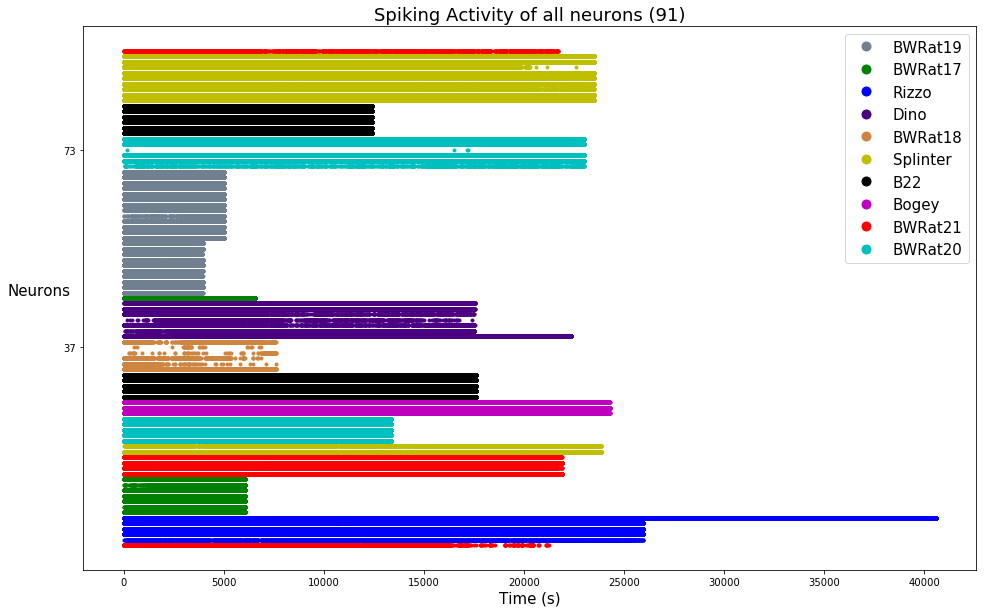

In [13]:
#changed the names again here so that recordings from the same animals have the same name under 'animal'
for neuron in all_neurons:  
    split_name = neuron[0].split('_',1)[0]
    if split_name == '20140527' or split_name == '20140528': 
        split_name = "B22"
    neuron[0] = split_name
    
fig, ax = plt.subplots(figsize=(16,10))
for i in range(len(all_neurons)):
    if all_neurons[i][0] == 'BWRat21': 
        ax.plot(all_neurons[i][1], (i+1) * np.ones_like(all_neurons[i][1]), 'r.', label = 'BWRat21')   
    elif all_neurons[i][0] == 'Rizzo': 
        ax.plot(all_neurons[i][1], (i+1) * np.ones_like(all_neurons[i][1]), 'b.', label = 'Rizzo')
    elif all_neurons[i][0] == 'BWRat17': 
        ax.plot(all_neurons[i][1], (i+1) * np.ones_like(all_neurons[i][1]), 'g.', label = 'BWRat17')
    elif all_neurons[i][0] == 'Splinter': 
        ax.plot(all_neurons[i][1], (i+1) * np.ones_like(all_neurons[i][1]), 'y.', label = 'Splinter') 
    elif all_neurons[i][0] == 'BWRat20': 
        ax.plot(all_neurons[i][1], (i+1) * np.ones_like(all_neurons[i][1]), 'c.',label = 'BWRat20') 
    elif all_neurons[i][0] == 'Bogey': 
        ax.plot(all_neurons[i][1], (i+1) * np.ones_like(all_neurons[i][1]), 'm.', label = 'Bogey')
    elif all_neurons[i][0] == 'B22': 
        ax.plot(all_neurons[i][1], (i+1) * np.ones_like(all_neurons[i][1]), 'k.', label = 'B22')
    elif all_neurons[i][0] == 'BWRat18': 
        ax.plot(all_neurons[i][1], (i+1) * np.ones_like(all_neurons[i][1]),'.', color='peru', label = 'BWRat18')
    elif all_neurons[i][0] == 'Dino': 
        ax.plot(all_neurons[i][1], (i+1) * np.ones_like(all_neurons[i][1]), '.', color='indigo', label = 'Dino') 
    elif all_neurons[i][0] == 'BWRat19': 
        ax.plot(all_neurons[i][1], (i+1) * np.ones_like(all_neurons[i][1]), '.', color='slategray', label = 'BWRat19')
        
plt.xlabel('Time (s)', fontsize = 15) 
ax.set_ylabel('Neurons', fontsize = 15, rotation = 'horizontal')
ax.yaxis.set_label_coords(-0.05,0.5)
plt.title('Spiking Activity of all neurons (91)', fontsize = 18)
plt.yticks([37,73])  

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),prop={'size': 15}, markerscale = 3)
plt.show()

## Spike Counts Within Each Brain State

In [11]:
# wake counts 
list_wake_counts = []
for i in range(len(all_neurons)): 
    for x in range(len(wake_sleep_per_animal[i][1])):
        wake_count = 0
        for j in all_neurons[i][1]:
                if wake_sleep_per_animal[i][1][x][0] <= j <= wake_sleep_per_animal[i][1][x][1]:
                    wake_count += 1
        time = wake_sleep_per_animal[i][1][x][1] - wake_sleep_per_animal[i][1][x][0]
        animal = wake_sleep_per_animal[i][0]
        neuron = i + 1 
        pair = [animal, neuron, wake_count, time]
        list_wake_counts.append(pair)

# sleep counts 
list_sleep_counts = []
for i in range(len(all_neurons)): 
    for x in range(len(wake_sleep_per_animal[i][2])):
        sleep_count = 0
        for j in all_neurons[i][1]:
                if wake_sleep_per_animal[i][2][x][0] <= j <= wake_sleep_per_animal[i][2][x][1]:
                    sleep_count += 1
        time = wake_sleep_per_animal[i][2][x][1] - wake_sleep_per_animal[i][2][x][0]
        animal = wake_sleep_per_animal[i][0]
        neuron = i + 1
        pair = [animal, neuron, sleep_count, time]
        list_sleep_counts.append(pair)

# rem counts
list_rem_counts = []
for i in range(len(all_neurons)): 
    for x in range(len(rem_non_rem_per_animal[i][1])):
        rem_count = 0
        for j in all_neurons[i][1]:
                if rem_non_rem_per_animal[i][1][x][0] <= j <= rem_non_rem_per_animal[i][1][x][1]:
                    rem_count += 1
        time = rem_non_rem_per_animal[i][1][x][1] - rem_non_rem_per_animal[i][1][x][0]
        animal = rem_non_rem_per_animal[i][0]
        neuron = i + 1
        pair = [animal,neuron, rem_count, time]
        list_rem_counts.append(pair)

# non-rem counts 
list_non_rem_counts = []
for i in range(len(all_neurons)): 
    for x in range(len(rem_non_rem_per_animal[i][2])):
        non_rem_count = 0
        for j in all_neurons[i][1]:
                if rem_non_rem_per_animal[i][2][x][0] <= j <= rem_non_rem_per_animal[i][2][x][1]:
                    non_rem_count += 1
        time = rem_non_rem_per_animal[i][2][x][1] - rem_non_rem_per_animal[i][2][x][0]
        animal = rem_non_rem_per_animal[i][0]
        neuron = i + 1 
        pair = [animal,neuron, non_rem_count, time]
        list_non_rem_counts.append(pair)

## Create DataFrames for each Brain State

In [1]:
# With the animal, the neuron, the number of spikes and the length of the brain state

In [12]:
# wake dataframe 
animals = []
neurons = []
counts = []
times = []
for recording in list_wake_counts: 
    animals.append(recording[0])
    neurons.append(recording[1])
    counts.append(recording[2])
    times.append(recording[3])
wake_table = pd.DataFrame({'animal' : animals, 'neuron' : neurons, 'count' : counts,'time' : times})
wake_table['FR'] = wake_table['count'] / wake_table['time']

# sleep dataframe 
animals = []
neurons = []
counts = []
times = []
for recording in list_sleep_counts: 
    animals.append(recording[0])
    neurons.append(recording[1])
    counts.append(recording[2])
    times.append(recording[3])
sleep_table = pd.DataFrame({'animal' : animals, 'neuron' : neurons, 'count' : counts,'time' : times})
sleep_table['FR'] = sleep_table['count'] / sleep_table['time']

# rem dataframe 
animals = []
neurons = []
counts = []
times = []
for recording in list_rem_counts: 
    animals.append(recording[0])
    neurons.append(recording[1])
    counts.append(recording[2])
    times.append(recording[3])
rem_table = pd.DataFrame({'animal' : animals, 'neuron' : neurons, 'count' : counts,'time' : times})
rem_table['FR'] = rem_table['count'] / rem_table['time']

# non-rem dataframe 
animals = []
neurons = []
counts = []
times = []
for recording in list_non_rem_counts: 
    animals.append(recording[0])
    neurons.append(recording[1])
    counts.append(recording[2])
    times.append(recording[3])    
non_rem_table = pd.DataFrame({'animal' : animals, 'neuron' : neurons, 'count' : counts,'time' : times})
non_rem_table['FR'] = non_rem_table['count'] / non_rem_table['time']

In [14]:
# Change names of animals so that different recording sessions of neurons within the same animal have the same name under the 'animal' column
names = list(wake_table['animal'])

new_names = []
for name in names: 
    split_name = name.split('_',1)
    new_names.append(split_name[0])
    
wake_table['animal'] = new_names

names = list(sleep_table['animal'])

new_names = []
for name in names: 
    split_name = name.split('_',1)
    new_names.append(split_name[0])
    
sleep_table['animal'] = new_names

names = list(rem_table['animal'])

new_names = []
for name in names: 
    split_name = name.split('_',1)
    new_names.append(split_name[0])
    
rem_table['animal'] = new_names

names = list(non_rem_table['animal'])

new_names = []
for name in names: 
    split_name = name.split('_',1)
    new_names.append(split_name[0])
    
non_rem_table['animal'] = new_names

non_rem_table.replace(['20140527', '20140528'], 'B22', inplace = True)
rem_table.replace(['20140527', '20140528'], 'B22', inplace = True)
sleep_table.replace(['20140527', '20140528'], 'B22', inplace = True)
wake_table.replace(['20140527', '20140528'], 'B22', inplace = True)

## Calculate mean firing rate per neuron

In [59]:
fr_wake_per_neuron = wake_df.groupby(['neuron', 'animal'], as_index=False)['FR'].mean().rename(columns = {'FR':'FR_wake', 'animal':'animal_wake'})
fr_sleep_per_neuron = sleep_df.groupby(['neuron', 'animal'], as_index=False)['FR'].mean().rename(columns = {'FR':'FR_sleep', 'animal':'animal_sleep'})
fr_rem_per_neuron = rem_df.groupby(['neuron', 'animal'], as_index=False)['FR'].mean().rename(columns = {'FR': 'FR_rem', 'animal':'animal_rem'})
fr_non_rem_per_neuron = non_rem_df.groupby(['neuron', 'animal'], as_index=False)['FR'].mean().rename(columns = {'FR':'FR_non_rem', 'animal':'animal_non_rem'})

In [60]:
fr_wake_per_neuron.head()

,neuron,animal_wake,FR_wake
0,1,BWRat21,2.240938
1,2,Rizzo,0.294010
2,3,Rizzo,16.983678
3,4,Rizzo,14.044171
4,5,Rizzo,4.658701


# Exploratory Analysis

## Removing neurons

### remove neurons missing in REM from sleep, wake and NREM datasets

In [6]:
missing_neurons = [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]
missing_neurons_index = [(neuron - 1) for neuron in missing_neurons]
fr_wake_per_neuron_adapted = fr_wake_per_neuron.drop(missing_neurons_index)
fr_non_rem_per_neuron_adapted = fr_non_rem_per_neuron.drop(missing_neurons_index)
fr_sleep_per_neuron_adapted = fr_sleep_per_neuron.drop(missing_neurons_index)

### removing neurons with low spiking activity 

In [7]:
fr_wake_per_neuron_adapted = fr_wake_per_neuron_adapted[(fr_wake_per_neuron_adapted.neuron != 73) & (fr_wake_per_neuron_adapted.neuron != 37)]
fr_non_rem_per_neuron_adapted = fr_non_rem_per_neuron_adapted[(fr_non_rem_per_neuron_adapted.neuron != 73) & (fr_non_rem_per_neuron_adapted.neuron != 37)]
fr_sleep_per_neuron_adapted = fr_sleep_per_neuron_adapted[(fr_sleep_per_neuron_adapted.neuron != 73) & (fr_sleep_per_neuron_adapted.neuron != 37)]
fr_rem_per_neuron = fr_rem_per_neuron[(fr_rem_per_neuron.neuron != 73) & (fr_rem_per_neuron.neuron != 37)]

In [9]:
fr_76_neurons = fr_sleep_per_neuron_adapted.merge(fr_wake_per_neuron_adapted, on = 'neuron').drop(columns = ['animal_wake', 'animal_sleep'])
fr_76_neurons = fr_76_neurons.merge(fr_non_rem_per_neuron_adapted, on = 'neuron').drop(columns = ['animal_non_rem'])
fr_76_neurons = fr_76_neurons.merge(fr_rem_per_neuron, on = 'neuron').rename(columns = {'animal_rem':'Rat'})
fr_76_neurons.head()

,neuron,FR_sleep,FR_wake,FR_non_rem,Rat,FR_rem
0,1,2.322130,2.240938,2.200581,BWRat21,4.672142
1,2,0.301134,0.294010,0.213826,Rizzo,0.551857
2,3,18.170373,16.983678,18.277612,Rizzo,14.915697
3,4,12.734141,14.044171,13.037109,Rizzo,12.520276
4,5,6.168566,4.658701,5.280228,Rizzo,9.516581


## Neuron Count Per Animal

In [36]:
count_neurons_per_animal = df_full_with_sleep_per_neuron_clean[df_full_with_sleep_per_neuron_clean.type == 'wake'].groupby(['animal'], as_index = False).count().drop(['FR','type'], axis = 1).rename(columns = {'animal':'rat',
                                          'neuron': 'Number Neurons'})

In [37]:
count_neurons_per_animal.head()

,rat,Number Neurons
0,B22,11
1,BWRat17,8
2,BWRat18,5
3,BWRat19,10
4,BWRat20,10


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

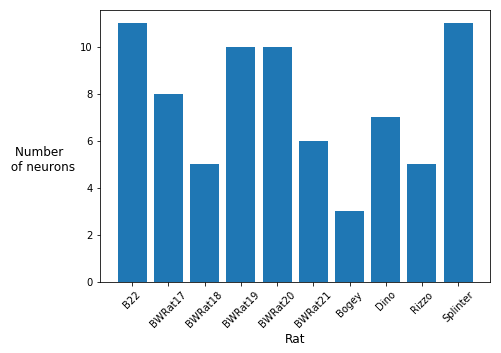

In [39]:
fig, ax = plt.subplots(figsize = (7,5))
ax.bar(count_neurons_per_animal['rat'],count_neurons_per_animal['Number Neurons'])
ax.set_ylabel('Number \n of neurons', rotation = 0, fontsize = 12)
ax.yaxis.set_label_coords(-0.15, 0.4)
ax.set_xlabel('Rat', fontsize = 12)
plt.xticks(rotation = 45)

## Boxplot of Mean Fring Rate per Neuron in each Brain State

In [ ]:
df_full_with_sleep_per_neuron_clean = pd.concat([fr_wake_per_neuron_adapted, fr_sleep_per_neuron_adapted, fr_rem_per_neuron, fr_non_rem_per_neuron_adapted])

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: bool 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: bool 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ] 
  figure: a `.Figure` instance 
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance 
  gid: an id string 
  horizontalalignment or ha: [ 'center' | 'right' | 'left' ] 
  label: object 
  linespacing: float (multiple of font size) 
  multialignment or ma: ['left' | 'right' | 'center' ] 
  path_

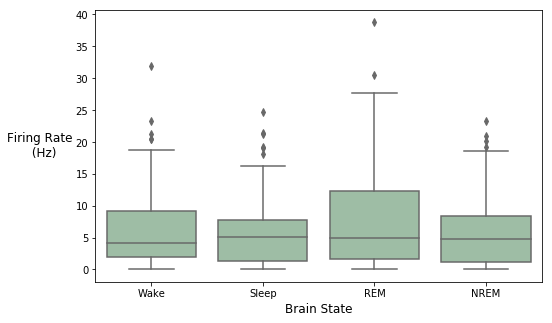

In [22]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x='type', y='FR', data=df_full_with_sleep_per_neuron_clean, color='#99c2a2')
ax.set_ylabel('Firing Rate \n (Hz)', fontsize =12, rotation = 0)
ax.yaxis.set_label_coords(-0.12, 0.45)
ax.set_xlabel('Brain State', fontsize = 12)
# plt.title('Firing Rate per Neuron in each Brain State', fontsize = 18)
xtickNames = plt.setp(ax, xticklabels= ['Wake', 'Sleep', 'REM','NREM'])
plt.setp(xtickNames)

## Distributions of Mean Firing Rate per Neuron in each Brain State

In [23]:
wake = df_full_with_sleep_per_neuron_clean[df_full_with_sleep_per_neuron_clean.type == 'wake']['FR']
rem = df_full_with_sleep_per_neuron_clean[df_full_with_sleep_per_neuron_clean.type == 'rem']['FR']
non_rem = df_full_with_sleep_per_neuron_clean[df_full_with_sleep_per_neuron_clean.type == 'non_rem']['FR']
sleep = df_full_with_sleep_per_neuron_clean[df_full_with_sleep_per_neuron_clean.type == 'sleep']['FR']

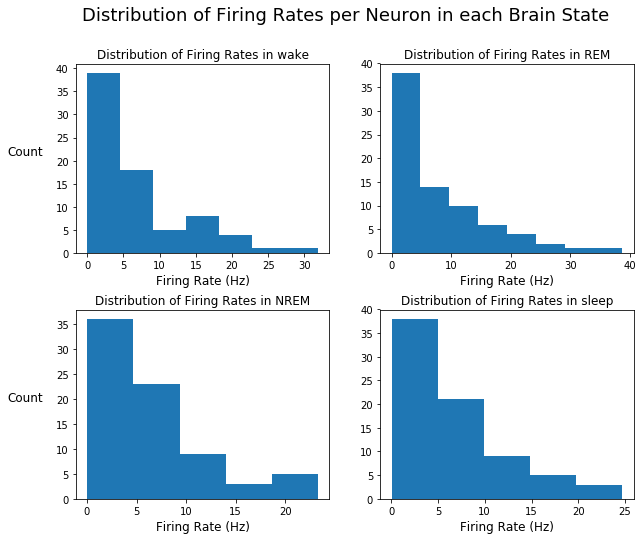

In [24]:
w = 5
n_wake = math.ceil((wake.max() - wake.min())/w)
n_non_rem = math.ceil((non_rem.max() - non_rem.min())/w)
n_rem = math.ceil((rem.max() - rem.min())/w)
n_sleep = math.ceil((sleep.max() - sleep.min())/w)

fig, ax = plt.subplots(2,2, figsize = (10,8))
ax[0,0].hist(wake, bins = int(n_wake))
ax[0,0].set_xlabel('Firing Rate (Hz)', fontsize = 12)
ax[0,0].set_title('Distribution of Firing Rates in wake')
ax[0,0].set_ylabel('Count', fontsize = 12, rotation = 0)
ax[0,0].yaxis.set_label_coords(-0.2,0.5)

ax[0,1].hist(rem, bins = int(n_rem))
ax[0,1].set_xlabel('Firing Rate (Hz)',fontsize = 12)
ax[0,1].set_title('Distribution of Firing Rates in REM')

ax[1,0].hist(non_rem, bins = int(n_non_rem))
ax[1,0].set_xlabel('Firing Rate (Hz)',fontsize = 12)
ax[1,0].set_title('Distribution of Firing Rates in NREM')
ax[1,0].set_ylabel('Count', fontsize = 12, rotation = 0)
ax[1,0].yaxis.set_label_coords(-0.2,0.5)

ax[1,1].hist(sleep, bins = int(n_sleep))
ax[1,1].set_xlabel('Firing Rate (Hz)',fontsize = 12)
ax[1,1].set_title('Distribution of Firing Rates in sleep')

fig.suptitle('Distribution of Firing Rates per Neuron in each Brain State', fontsize = 18)
fig.subplots_adjust(hspace = 0.3)

## Violin Plot of Mean Firing Rate per Neuron in each Brain State and Rat

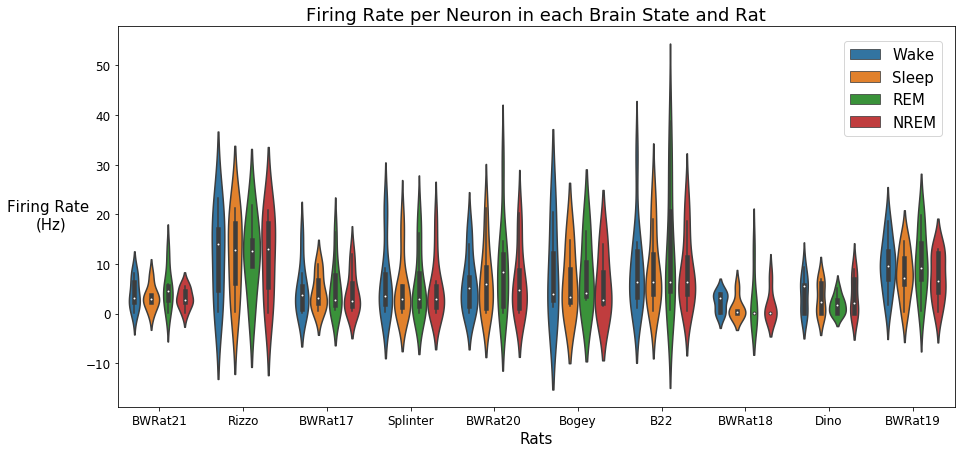

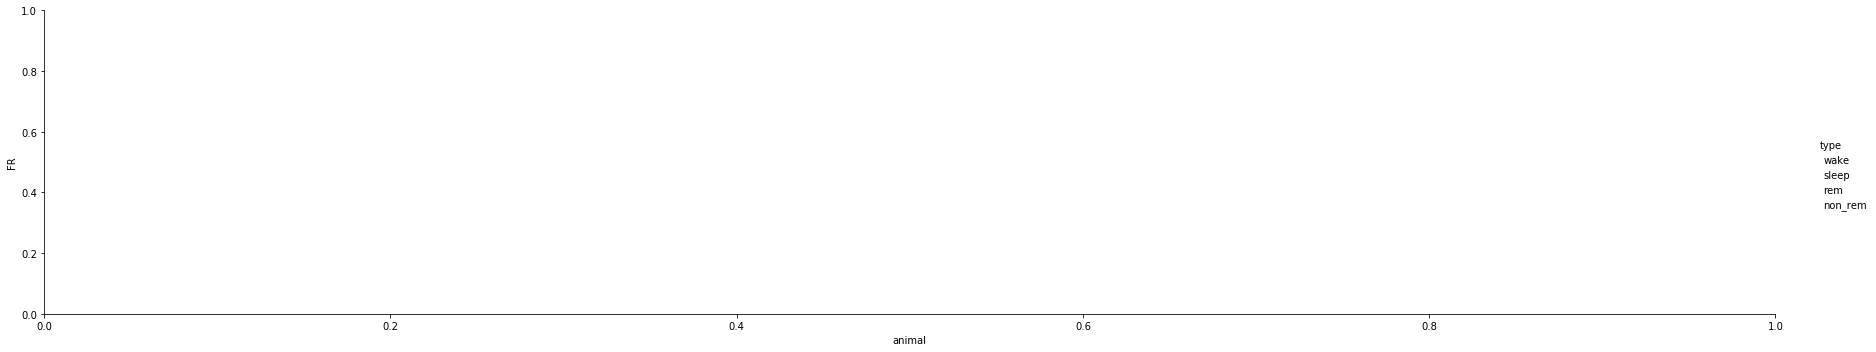

In [53]:
fig, ax = plt.subplots(1,1,figsize = (15,7))
sns.catplot(ax=ax, data= df_full_with_sleep_per_neuron_clean, x="animal", y="FR", dodge=True, hue='type', kind='violin', ci = 'sd', capsize=.1, errwidth=1,height =5, aspect = 5)

ax.legend(bbox_to_anchor=(0.82, 1), loc=2, borderaxespad=1., fontsize = 15)

ax.set_ylabel('Firing Rate \n(Hz)', rotation = 0, fontsize = 15)
ax.set_xlabel('Rats', fontsize = 15)
ax.yaxis.set_label_coords(-0.08, 0.46)
ax.set_title('Firing Rate per Neuron in each Brain State and Rat', fontsize = 18)
ax.get_xticklabels(['BWRat21', 'Rizzo', 'BWRat17', 'Splinter', 'BWRat20', 'Bogey', 'B22', 'BWRat18', 'Dino', 'BWRat19'])
ax.tick_params(labelsize = 12)

handles, labels = ax.get_legend_handles_labels()
new_labels = ['Wake', 'Sleep','REM', 'NREM']
ax.legend(handles, new_labels, bbox_to_anchor=(0.85, 1), loc=2, borderaxespad=1., fontsize = 15)

plt.show()

# Results from LMEs

In [44]:
fr_wake = list(fr_76_neurons['FR_wake'])
fr_wake.sort()

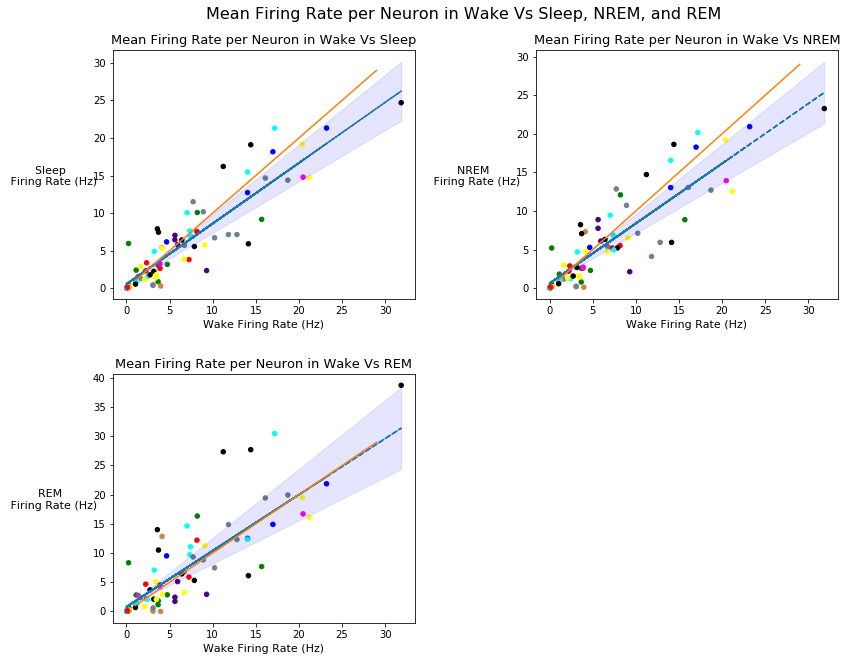

In [45]:
x = range(1,30)
y = range(1,30)

m, b = (0.80632 ,0.55023)

colors = {'B22':'black', 'BWRat17':'green', 'BWRat18':'peru', 'BWRat19':'slategray', 'Bogey': 'magenta', 'BWRat20':'cyan', 'BWRat21':'red', 'Dino':'indigo', 'Rizzo':'blue','Splinter':'yellow'}


plt.show()
fig, axes = plt.subplots(2,2, figsize = (13,10))
axes[0,0].scatter(fr_76_neurons['FR_wake'], fr_76_neurons['FR_sleep'], s = 20, c= fr_76_neurons['Rat'].apply(lambda x: colors[x]))
axes[0,0].plot(fr_76_neurons['FR_wake'], m*np.array(fr_76_neurons['FR_wake']) + b,'--')
axes[0,0].fill_between(x = fr_wake, y1 = 0.68348*np.array(fr_wake) + b, y2 = 0.92916*np.array(fr_wake) + b, color='b', alpha=.1)
axes[0,0].plot(x,y)
axes[0,0].set_xlabel('Wake Firing Rate (Hz)', fontsize = 11)
axes[0,0].set_ylabel('Sleep \n Firing Rate (Hz)', fontsize =11, rotation = 0)
axes[0,0].yaxis.set_label_coords(-0.2,0.45)
axes[0,0].set_title('Mean Firing Rate per Neuron in Wake Vs Sleep', fontsize = 13)

m_bis, b_bis = (0.77655, 0.6187)

axes[0,1].scatter(fr_76_neurons['FR_wake'], fr_76_neurons['FR_non_rem'], s = 20, c= fr_76_neurons['Rat'].apply(lambda x: colors[x]))
axes[0,1].plot(fr_76_neurons['FR_wake'], m_bis*np.array(fr_76_neurons['FR_wake']) + b_bis,'--', label = 'line of best fit')
axes[0,1].fill_between(x = fr_wake, y1 = 0.65117*np.array(fr_wake) + b_bis, y2 = 0.90194*np.array(fr_wake) + b_bis, color='b', alpha=.1)
axes[0,1].plot(x,y, label = 'diagonal')
axes[0,1].set_xlabel('Wake Firing Rate (Hz)', fontsize = 11)
axes[0,1].set_ylabel('NREM \n Firing Rate (Hz)', fontsize = 11, rotation = 0)
axes[0,1].yaxis.set_label_coords(-0.2,0.45)
axes[0,1].set_title('Mean Firing Rate per Neuron in Wake Vs NREM',fontsize = 13)

m_tris, b_tris = (0.96094,0.78181)

axes[1,0].scatter(fr_76_neurons['FR_wake'], fr_76_neurons['FR_rem'], s = 20, c= fr_76_neurons['Rat'].apply(lambda x: colors[x]))
axes[1,0].plot(fr_76_neurons['FR_wake'], m_tris*np.array(fr_76_neurons['FR_wake']) + b_tris,'--', label = 'line of best fit')
axes[1,0].fill_between(x = fr_wake, y1 = 0.74107*np.array(fr_wake) + b_tris, y2 = 1.1808*np.array(fr_wake) + b_tris, color='b', alpha=.1)
axes[1,0].plot(x,y, label = 'diagonal')
axes[1,0].set_xlabel('Wake Firing Rate (Hz)', fontsize = 11)
axes[1,0].set_ylabel('REM \n Firing Rate (Hz)', fontsize = 11, rotation = 0)
axes[1,0].yaxis.set_label_coords(-0.2,0.45)
axes[1,0].set_title('Mean Firing Rate per Neuron in Wake Vs REM',fontsize = 13)

fig.delaxes(axes[1,1])

plt.subplots_adjust(wspace = 0.4, hspace = 0.3, top= 0.92)
plt.suptitle('Mean Firing Rate per Neuron in Wake Vs Sleep, NREM, and REM', fontsize = 16)
plt.show()